In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import os
import shutil
import time

In [2]:
cwd = os.getcwd()     

players = ['simonr0204', '01zaporozhets', 'dragman', 'Marky_Boi', 'Jaideka', 'Lt-GobelCoque']      #Players to compare       


destination = os.path.join(cwd, '-'.join(players)) 
if not os.path.exists(destination):
    os.makedirs(destination)
else:
    shutil.rmtree(destination)           
    os.makedirs(destination) 

In [3]:
def get_data(players):

    with open('API_KEY.txt', 'r') as keyfile:
        api_key = keyfile.read()                                           #Your API key goes here
                                         

    def getID(playername):                                          #Gets the player ID associated with each player name. Seems like this 2nd call to API could be avoided

        url = "https://api.pubg.com/shards/steam/players?filter[playerNames]="+playername          
        header = {
          "Authorization": "Bearer "+api_key,
          "Accept": "application/vnd.api+json"
        }

        IDdata = requests.get(url, headers=header).json()
        return (IDdata['data'][0]['id'])
       
    jsons=[]
    IDS = []
    for player in players:
        IDS.append(getID(player))

    time.sleep(60)  #API request limit is 10 requests per minute so sleep for one minute before moving on
    
    for ID in IDS:                                                #Gets the lifetime history of each player ID
        url = f'https://api.pubg.com/shards/steam/players/{ID}/seasons/lifetime'          
        header = {
          "Authorization": "Bearer "+api_key,
          "Accept": "application/vnd.api+json"
        }
        response = requests.get(url, headers=header).json()
        jsons.append(response)

   
    #Concatenate and tidy up the data
    all_data = pd.concat([pd.DataFrame(jsons[i]['data']['attributes']['gameModeStats']) for i,_ in enumerate(players)], axis=1, keys = players)
    all_data = all_data.transpose()
    all_data.fillna(0, inplace=True)
    all_data.to_excel('-'.join(players)+'.xls')      #save to excel file
    shutil.move('-'.join(players)+'.xls', destination)
    return all_data

In [4]:
data = get_data(players)
data

assists  bestRankPoint  boosts  dBNOs  dailyKills  \
simonr0204    duo              0        0.00000       0      0           0   
              duo-fpp        108     1947.64160     339    351           7   
              solo             0        0.00000       0      0           0   
              solo-fpp         2     1758.44670      33      0           4   
              squad            0        0.00000       0      0           0   
              squad-fpp       25     1266.08920      69     85          20   
01zaporozhets duo              0        0.00000       0      0           0   
              duo-fpp         69     1727.17220     419    276           1   
              solo             0        0.00000       0      0           0   
              solo-fpp         0        0.00000       0      0           0   
              squad            0        0.00000       0      0           0   
              squad-fpp       22     1114.44900      51     47          15   
dragman       duo              0        0.00000       0      0           0   
              duo-fpp         10     1024.59190      30     28           1   
              solo             0        0.00000       0      0           0   
              solo-fpp         0        0.00000       0      0           0   
              squad            0        0.00000       0      0           0   
              squad-fpp       49     1309.79280     127    110          12   
Marky_Boi     duo              0        0.00000       0      0           0   
              duo-fpp         19     1008.48425      45     40           1   
              solo             0        0.00000       0      0           0   
              solo-fpp         2     1153.83340      25      0           6   
              squad            0        0.00000       0      0           0   
              squad-fpp       26     1119.10050      67     54           3   
Jaideka       duo              0        0.00000       0      0           0   
              duo-fpp          2      976.58575      12      4           1   
              solo             0        0.00000       0      0           0   
              solo-fpp         0        0.00000       0      0           0   
              squad            0        0.00000       0      0           0   
              squad-fpp       18     1108.77980      27     16           4   
Lt-GobelCoque duo              0        0.00000       0      0           0   
              duo-fpp          3     1455.22680       6      3           0   
              solo             0        0.00000       0      0           0   
              solo-fpp         0        0.00000       0      0           0   
              squad            0        0.00000       0      0           0   
              squad-fpp       31     1182.56210     138     77           5   

                         dailyWins  damageDealt  days  headshotKills  heals  \
simonr0204    duo                0       0.0000     0              0      0   
              duo-fpp            0   75266.7660    54            162    697   
              solo               0       0.0000     0              0      0   
              solo-fpp           0    6389.0356    12             17     41   
              squad              0       0.0000     0              0      0   
              squad-fpp          0   13001.5010    12             22     87   
01zaporozhets duo                0       0.0000     0              0      0   
              duo-fpp            0   52272.2300    52             69   1060   
              solo               0       0.0000     0              0      0   
              solo-fpp           0     100.0000     2              0      0   
              squad              0       0.0000     0              0      0   
              squad-fpp          0    6578.0747     9             12    129   
dragman       duo                0       0.0000     0              0      0   
              duo-fpp           

In [5]:
#Generate plots for each mode, each with comparisons of the players over all attributes (except attributes specified to drop)
def generate_plots(data, plots_to_drop):                           
  
    data = data.drop(plots_to_drop, axis=1)                                           

    for m in modes:                                                    
        fig = plt.figure(figsize=(40,35), dpi=100)
        fig.suptitle('PUBG 2018 - '+'-'.join(players)+'-'+m, fontsize=40)  
        print(f'Comparing players in mode {m}')
        for i,col in enumerate(data.columns):
            fig.add_subplot(4, 8, i+1, xmargin=0.5, ymargin=0.5)
            fig.subplots_adjust(wspace=0.5, hspace=0.5)
            data.xs(m, level=1)[col].plot(kind='bar', title=col)
            fig.savefig(destination+'\\'+m)                         #Save figure to file

Comparing players in mode solo-fpp
Comparing players in mode duo-fpp
Comparing players in mode squad-fpp


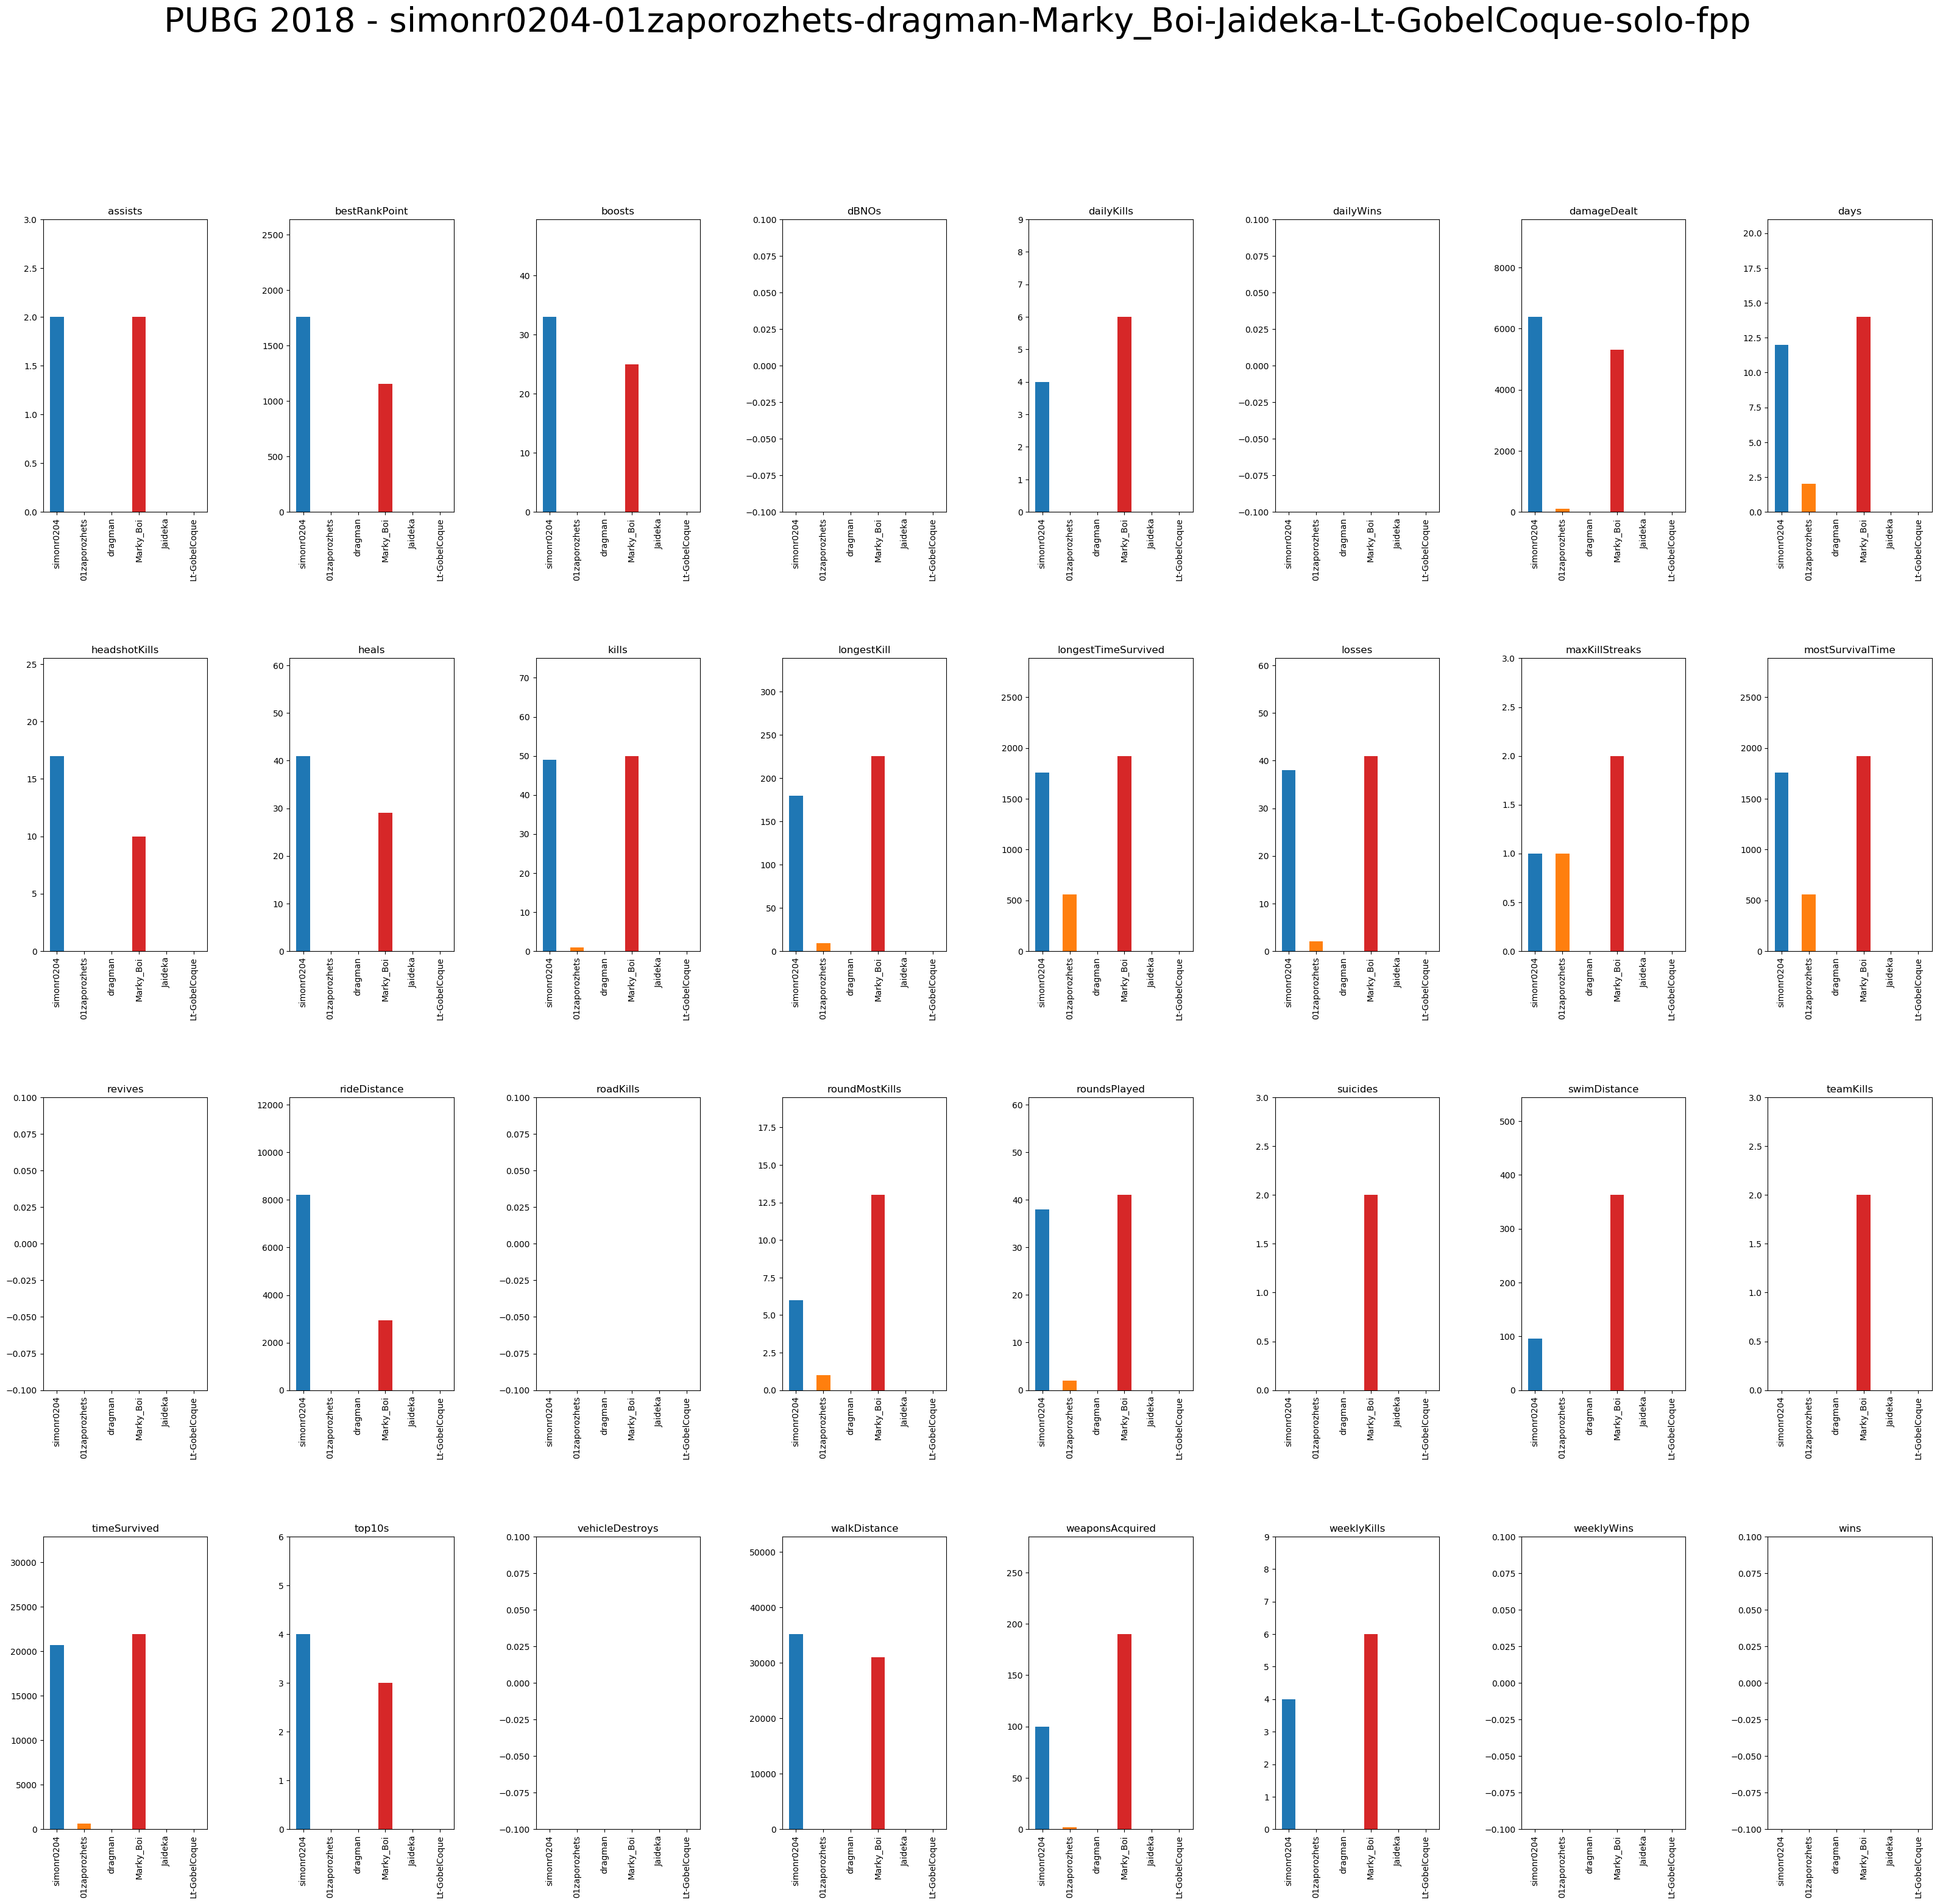

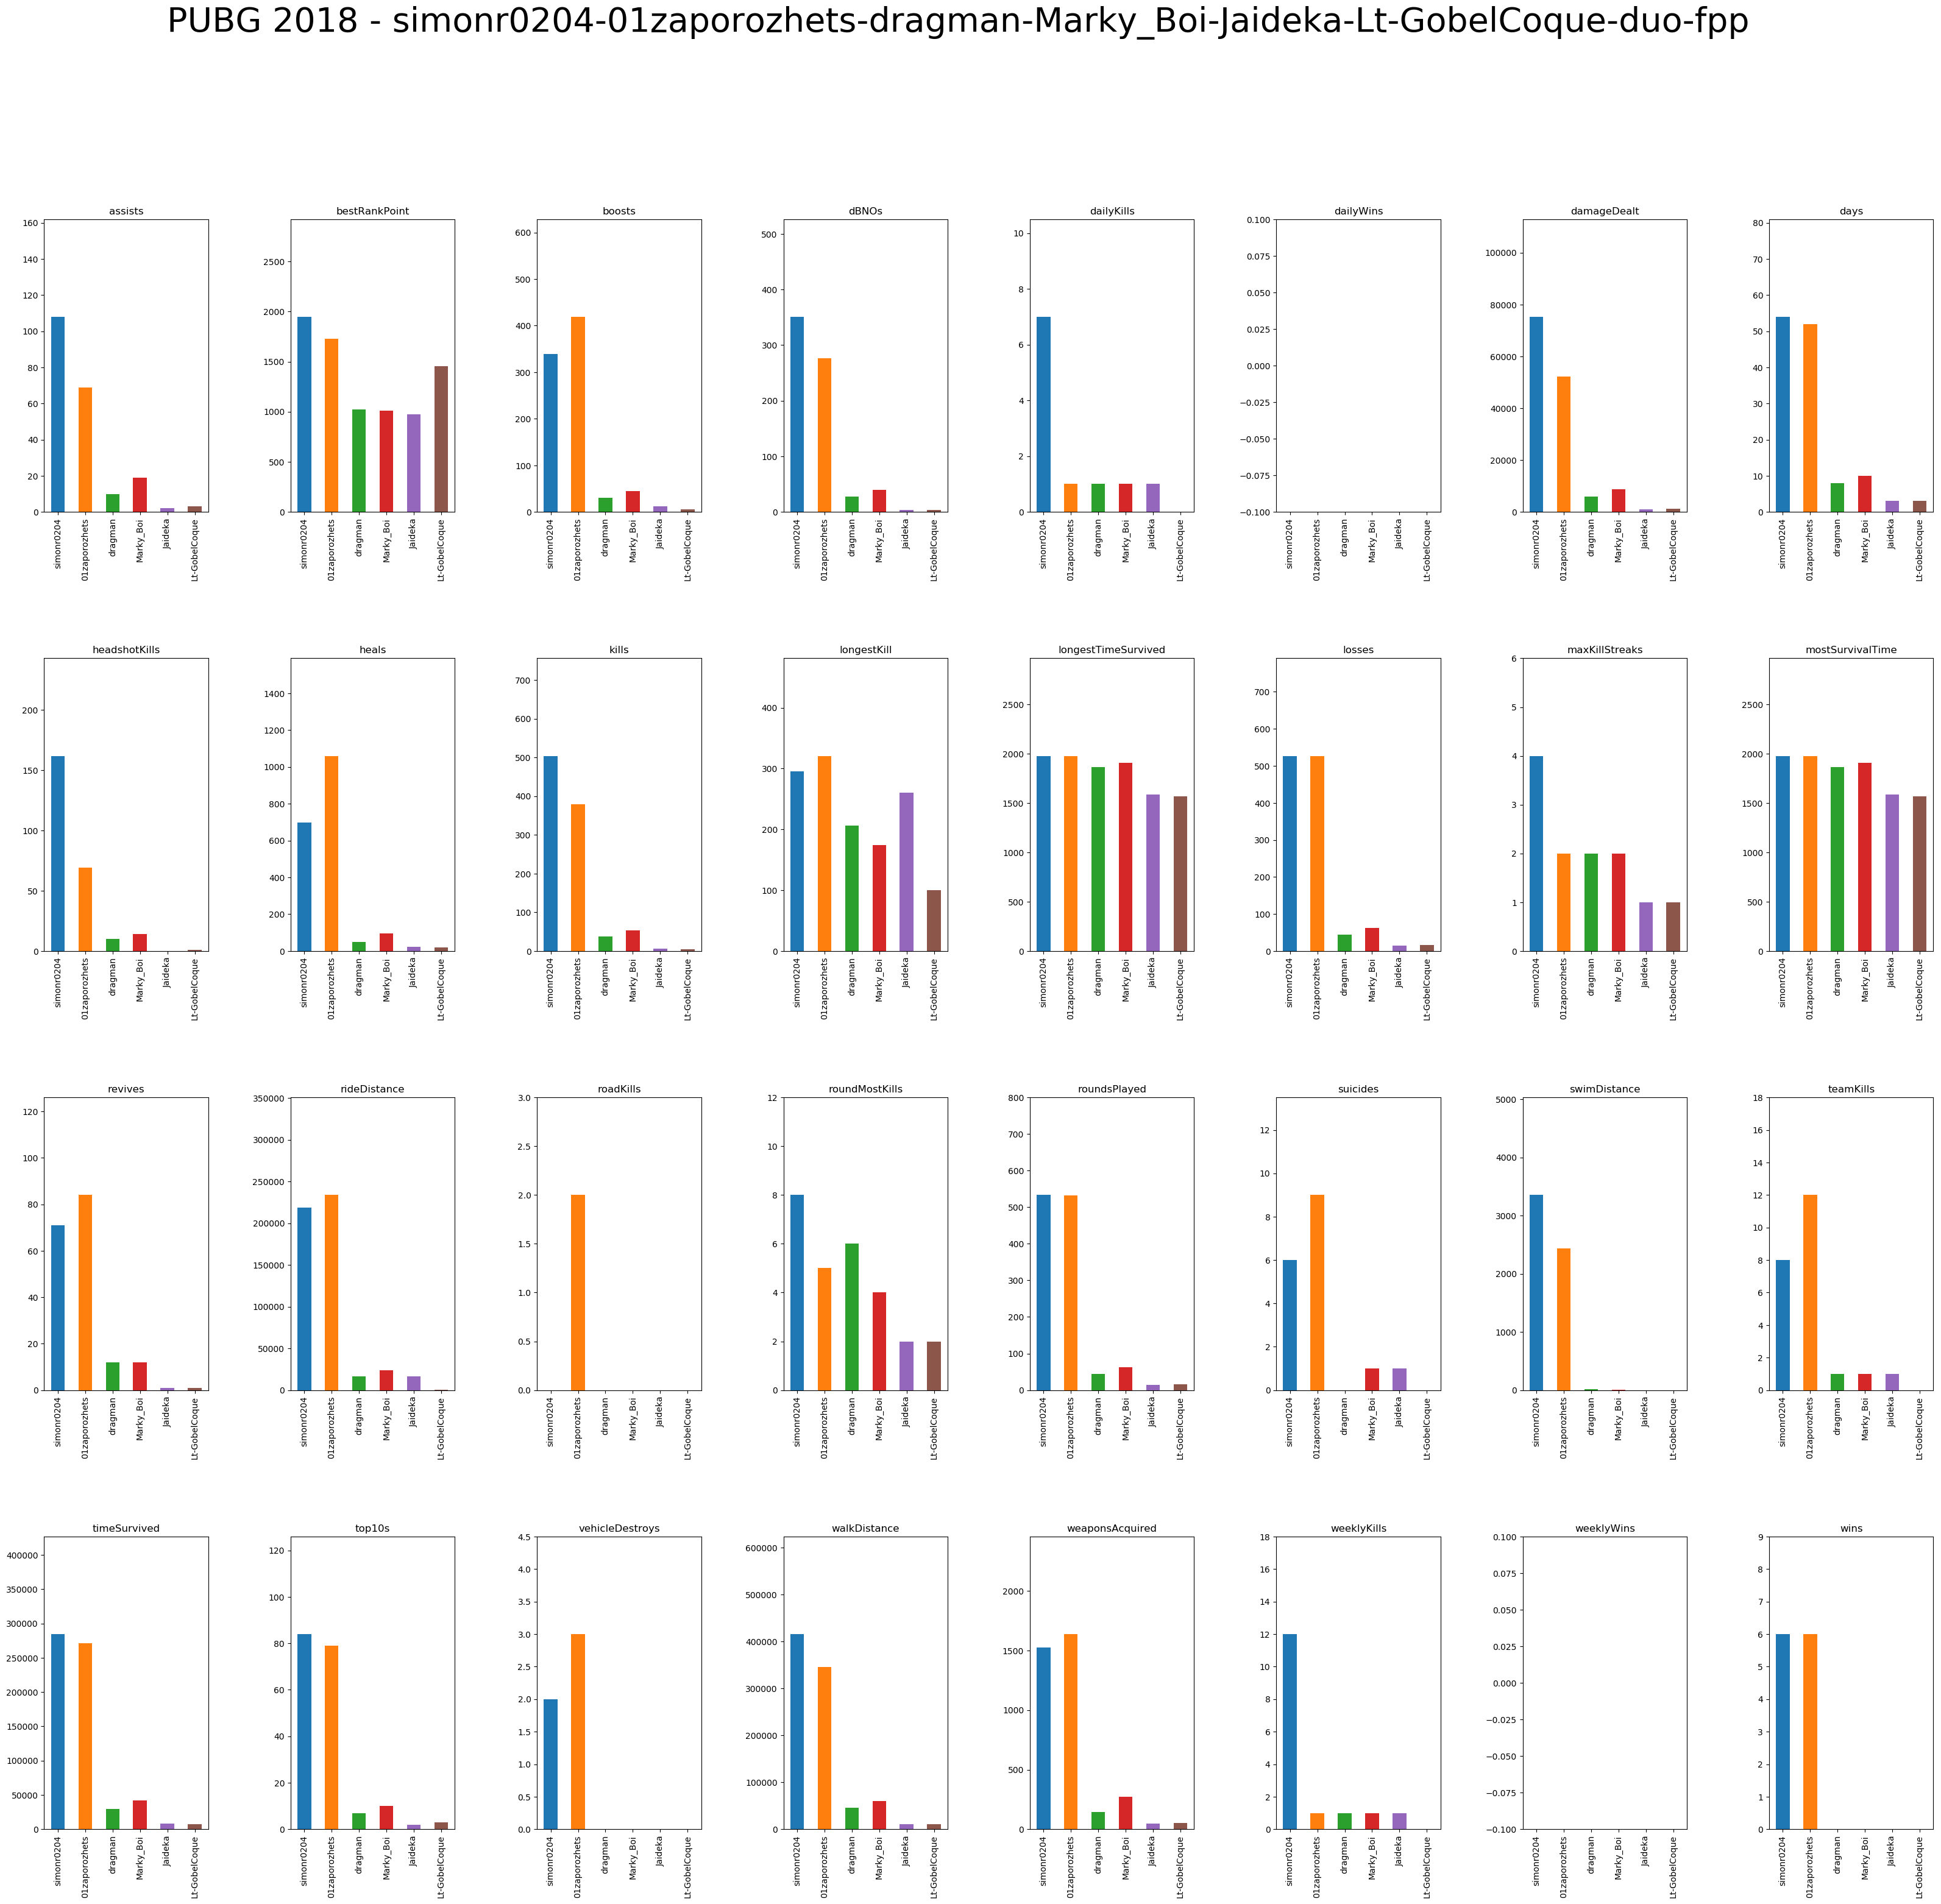

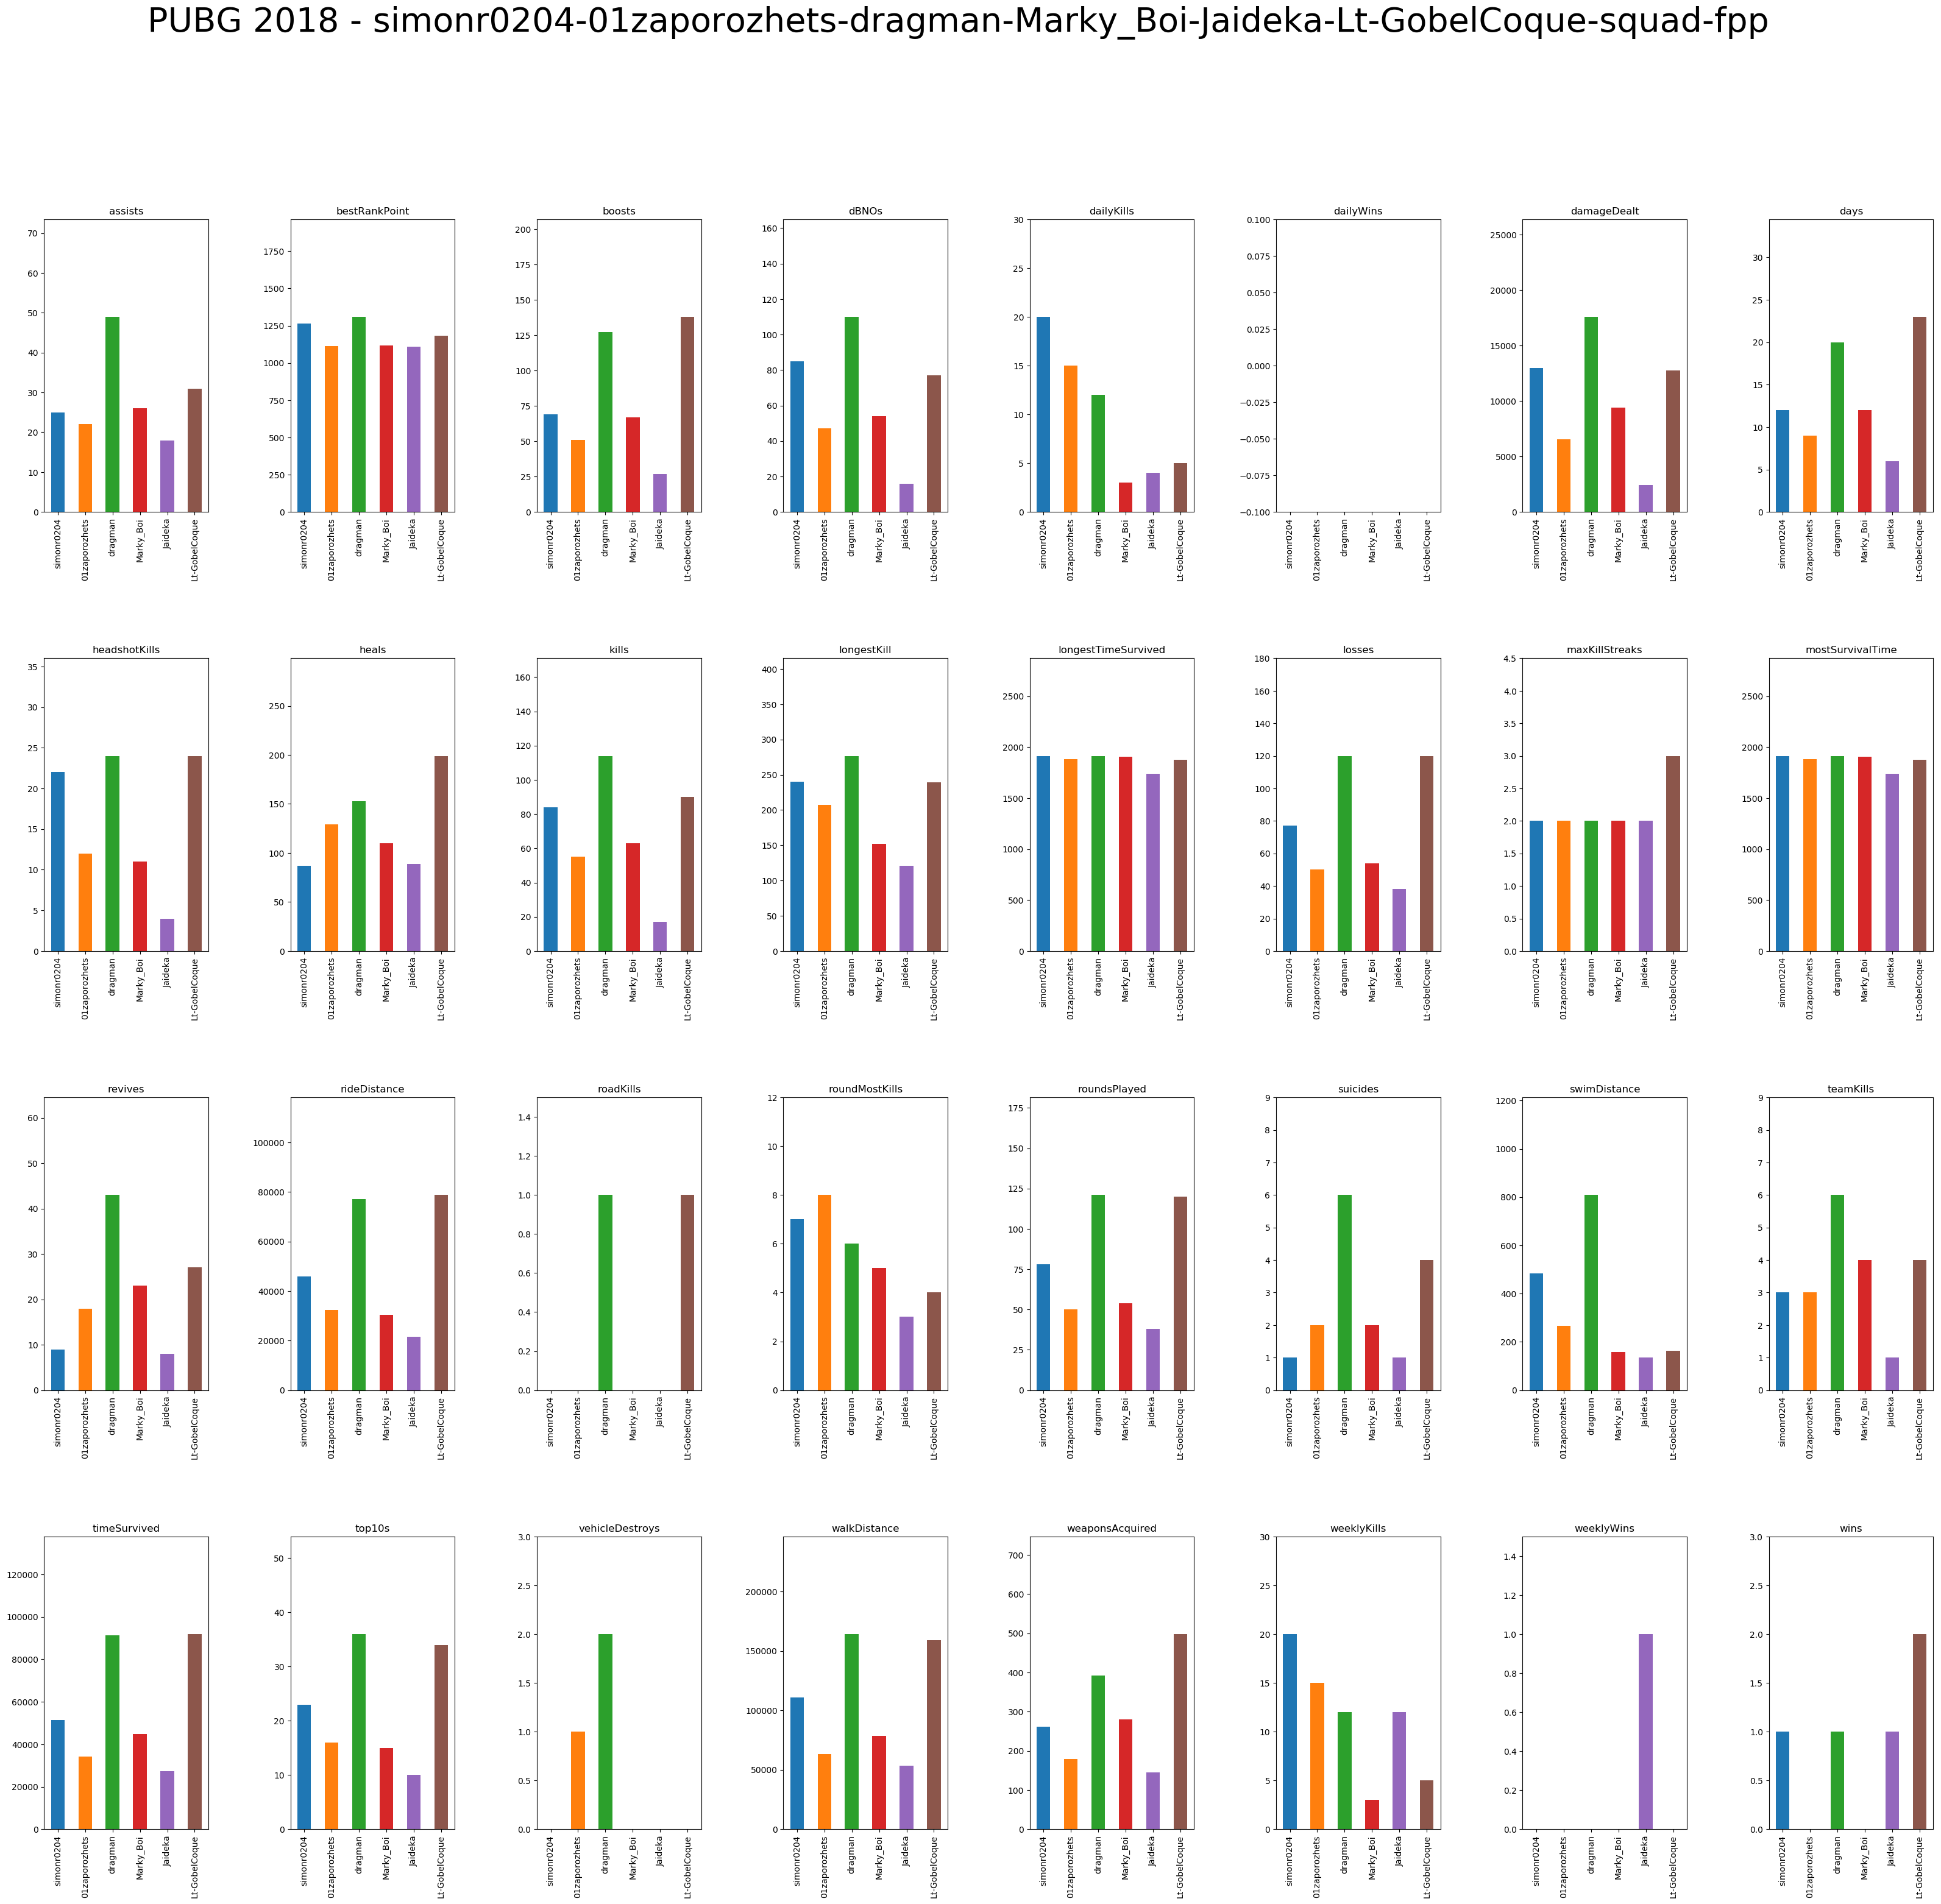

In [6]:
modes = ['solo-fpp', 'duo-fpp' , 'squad-fpp']                 #Modes to draw plots for (one file per mode. Option are: solo/duo/squad  - fpp/tpp)
plots_to_drop = ['rankPointsTitle','rankPoints','killPoints','winPoints']  #Attributes not to include in figures

generate_plots(data, plots_to_drop)

In [7]:
#Plot the KD ratio of each player in each mode
def plot_kd_ratio(data):
    
    data['KD'] = (data['kills']/data['losses']).fillna(data['kills'])
    fig, axes = plt.subplots(nrows=1, ncols=len(modes), figsize=(10,6))
    fig.suptitle(f'PUBG 2018 - '+'-'.join(players)+'- KD ratios')
    i=0
    for m in modes:
        axis=axes[i]
        axis.set_title(m)
        plt.subplots_adjust(top=0.9)
        data.xs(m, level=1)['KD'].plot(kind='bar', ax=axis)     
        i+=1
    fig.savefig(f'{destination}\\KD_ratios')

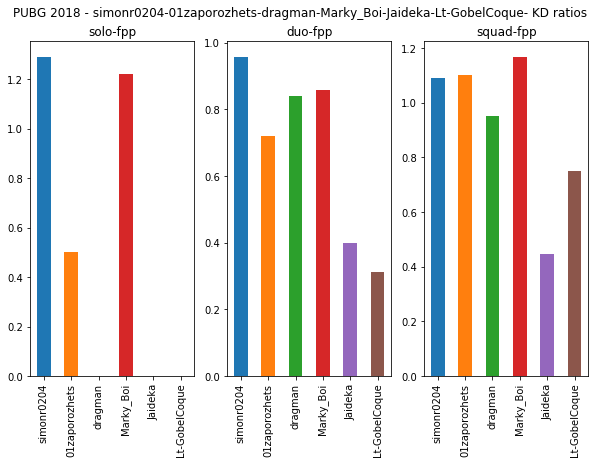

In [8]:
plot_kd_ratio(data)